In [16]:
# standard packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log


# sklearn modules
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
 


In [17]:
# Load training and test data
train_data = pd.read_csv('../cleaned_data/train_data_better_clean.csv')
test_data = pd.read_csv('../cleaned_data/test_data_better_clean.csv')
                         
# Identify target variable and drop it from 
target = train_data['SalePrice']
X = train_data.drop(['SalePrice', 'Id'], axis = 1)

# Preview Data
display(train_data.tail())
display(test_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1453,1456,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,3,...,0,0,0,1,0,0,0,1,0,12.072547
1454,1457,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,3,...,0,0,0,1,0,0,0,1,0,12.254868
1455,1458,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5,...,0,0,0,1,0,0,0,1,0,12.493133
1456,1459,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3,...,0,0,0,1,0,0,0,1,0,11.864469
1457,1460,3.044522,4.330733,9.204121,5,6,1965,1965,0.000000,4,...,0,0,0,1,0,0,0,1,0,11.901590


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,3,...,0,0,0,0,1,0,0,0,1,0
1,1462,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,3,...,0,0,0,0,1,0,0,0,1,0
2,1463,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,3,...,0,0,0,0,1,0,0,0,1,0
3,1464,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,3,...,0,0,0,0,1,0,0,0,1,0
4,1465,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,4,...,0,0,0,0,1,0,0,0,1,0


In [18]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

display(X_train.head())

X_train : (1020, 206)
X_test : (438, 206)
y_train : (1020,)
y_test : (438,)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
187,3.931826,4.110874,9.250618,5,7,1916,1987,0.000000,3,3,...,0,0,0,0,1,0,0,0,1,0
1003,4.795791,3.784190,8.065579,7,5,2005,2006,2.833213,4,3,...,0,0,0,0,1,0,0,0,1,0
10,3.044522,4.262680,9.323758,5,5,1965,1965,0.000000,3,3,...,0,0,0,0,1,0,0,0,1,0
762,4.110874,4.418841,9.151757,8,5,1999,1999,6.513230,4,3,...,0,0,0,0,1,0,0,0,1,0
590,4.110874,4.584967,9.508888,10,5,2008,2008,6.042633,5,3,...,1,0,0,0,0,0,0,0,1,0


In [19]:
# function to ensure no negative values are predited
def pos_func(a):
    if (a > 0): return a
    else: return 0
pos_func = np.vectorize(pos_func)

# Scoring function.
# In order to test for kaggle score we must create a function to score predictions as they are scored in the competition rules
def rmse_log(values, predictions):
    delta_preds = pos_func(predictions)

    log_vals = values
    log_preds = delta_preds
    
    return sqrt(mean_squared_error(log_vals, log_preds))

Best parameters: {'n_components': 8}
Best cross-validation score: 0.12826848437089453
Test set score: 0.11816673209233507


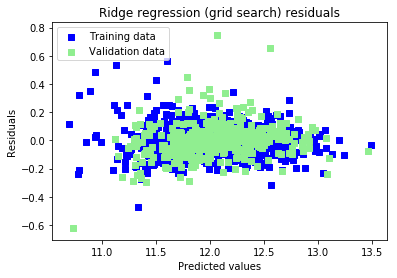

In [21]:
# now lets do a grid search to try improve our score
param_grid = {'n_components' : [2,3,4,5,6,7,8,9,10]}

# create scoring function to be used in grid search
my_scorer = make_scorer(rmse_log, greater_is_better = False)

# create grid search and fit
pls_grid_search = GridSearchCV(PLSRegression(), param_grid, cv = 5, scoring = my_scorer)
pls_grid_search.fit(X_train, y_train)

# display model fit parameters.
print('Best parameters: {}'.format(pls_grid_search.best_params_))
print('Best cross-validation score: {}'.format(-pls_grid_search.best_score_))
print('Test set score: {}'.format(-pls_grid_search.score(X_test, y_test)))

# predictions for training and test set.
pls_train_pred = pos_func(pls_grid_search.predict(X_train))
pls_test_pred = pos_func(pls_grid_search.predict(X_test))


# residuals
pls_train_resids = pls_train_pred.flatten() - y_train
pls_test_resids = pls_test_pred.flatten() - y_test

# Plot residuals
plt.scatter(pls_train_pred, pls_train_resids, c = "blue", marker = "s", label = "Training data")
plt.scatter(pls_test_pred, pls_test_resids, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge regression (grid search) residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

In [25]:
# predictions for comp entry.
pls_predicts = pos_func(pls_grid_search.predict(test_data.drop('Id', axis = 1)))

pls_predicts = pls_predicts.flatten()

pls_submission = pd.DataFrame({'Id':test_data['Id'], 'SalePrice':np.expm1(pls_predicts)})
pls_submission = pls_submission.set_index('Id')

# preview submission
display(pls_submission.head())

pls_submission.to_csv('../submissions/03_dim_reduction/pls_grid_submission.csv')

,SalePrice
Id,
1461,126072.718859
1462,165652.841261
1463,185675.439414
1464,198864.075330
1465,197320.500115


In [33]:
# add partial least squares to our ensemble submission.

ensemble = pd.read_csv('../submissions/02_better_models/ensemble_sub.csv', index_col = 'Id')

new_ensemble = ((1/4) * ensemble) + ((3/4) * pls_submission) 

new_ensemble.to_csv('../submissions/03_dim_reduction/new_ensemble.csv')

,SalePrice
Id,
1461,122687.947446
1462,158496.010423
1463,181712.811002
1464,195681.964990
1465,194850.398074
